In [123]:
import os, re, glob
import cv2
import dlib
import numpy as np
#import face_recognition as frc
import time
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [80]:
!curl -L -o ./haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!curl -L -o ./haarcascade_profileface.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_profileface.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 11  908k   11  108k    0     0  41811      0  0:00:22  0:00:02  0:00:20 41811
 19  908k   19  179k    0     0  58045      0  0:00:16  0:00:03  0:00:13 58027
100  908k  100  908k    0     0   246k      0  0:00:03  0:00:03 --:--:--  246k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  809k    0  2742    0     0   3574      0  0:03:51 --:--:--  0:03:51  3574
100  809k  100  809k    0     0   721k      0  0:0

In [167]:
# training image master 경로
groups_folder_path = 'C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/'
# 구분할 이미지의 종류. 다현 or 예지 이므로 2개 짜리 list
categories = ["0", "1"]
folder_name = ['0_no_make_up', '1_red_lip']
file_name = ['no_', 'red_lip_']
# 카테고리, 인덱스 라벨링

idx = 0
for idex, categorie in enumerate(categories):
    image_dir = groups_folder_path + folder_name[idx] + '/'
    print(image_dir)
    n = 1
    # image_dir 경로의 모든 파일들에 대하여 작업
    for top, dirs, f in os.walk(image_dir):
        # 경로내 모든 파일에 대하여
        for filename in f:
            # 파일불러오기
            img = cv2.imread(image_dir+filename)
            if img is None:
                continue
            #print(image_dir+filename)
            # 불러온 파일 gray화
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # gray 파일 얼굴인식
            face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
            faces = face_cascade.detectMultiScale(gray_img, 1.03, 5)
            
            if type(faces) == tuple:
                face_cascade = cv2.CascadeClassifier('haarcascade_profileface.xml')
                faces = face_cascade.detectMultiScale(gray_img, 1.03, 5)
                if type(faces) == tuple: # 인식 된 얼굴이 없으면 작업 넘기기
                    continue
            else:
                for (x,y,w,h) in faces:
                    img_ = img[y:y + h, x:x + w]
                    img_ = cv2.resize(img_, dsize = (128,128), interpolation=cv2.INTER_AREA)
                    #print(groups_folder_path+ categories[idx] + '/train_' + file_name[idx] + str(n) + '.jpg')
                    cv2.imwrite(groups_folder_path+ categories[idx] + '/train_' + file_name[idx] + str(n) + '.jpg', img_)
                    n += 1
    idx += 1 

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0_no_make_up/
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1_red_lip/


[[154  20 106 106]
 [ 16  48 100 100]]


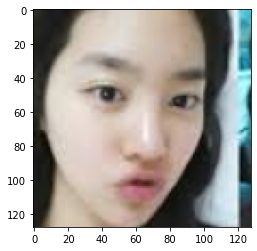

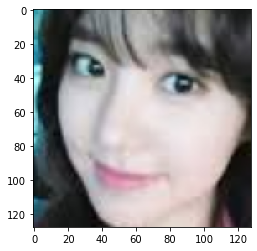

In [135]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
groups_folder_path = 'C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0/'
img = cv2.imread(groups_folder_path+'no_25.jpg')   

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.03, 5)
print(face)
for (x,y,w,h) in faces:
    #cropped = gray_img[y:y + h, x:x + w]
    #cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    img_ = img[y:y + h, x:x + w]
    img_ = cv2.resize(img_, dsize = (128,128), interpolation=cv2.INTER_AREA)
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    #plt.figure(figsize=(12,12))
    plt.imshow(img_)  
    plt.show()

In [127]:
detector = dlib.get_frontal_face_detector()
 
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


cap = cv.VideoCapture(0)


# range는 끝값이 포함안됨   
ALL = list(range(0, 68)) 
RIGHT_EYEBROW = list(range(17, 22))  
LEFT_EYEBROW = list(range(22, 27))  
RIGHT_EYE = list(range(36, 42))  
LEFT_EYE = list(range(42, 48))  
NOSE = list(range(27, 36))  
MOUTH_OUTLINE = list(range(48, 61))  
MOUTH_INNER = list(range(61, 68)) 
JAWLINE = list(range(0, 17)) 

index = ALL

while True:

    ret, img_frame = cap.read()

    img_gray = cv.cvtColor(img_frame, cv.COLOR_BGR2GRAY)


    dets = detector(img_gray, 1)


    for face in dets:

        shape = predictor(img_frame, face) #얼굴에서 68개 점 찾기

        list_points = []
        for p in shape.parts():
            list_points.append([p.x, p.y])

        list_points = np.array(list_points)


        for i,pt in enumerate(list_points[index]):

            pt_pos = (pt[0], pt[1])
            cv.circle(img_frame, pt_pos, 2, (0, 255, 0), -1)

        
        cv.rectangle(img_frame, (face.left(), face.top()), (face.right(), face.bottom()),
            (0, 0, 255), 3)


    cv.imshow('result', img_frame)

    
    key = cv.waitKey(1)

    if key == 27:
        break
    
    elif key == ord('1'):
        index = ALL
    elif key == ord('2'):
        index = LEFT_EYEBROW + RIGHT_EYEBROW
    elif key == ord('3'):
        index = LEFT_EYE + RIGHT_EYE
    elif key == ord('4'):
        index = NOSE
    elif key == ord('5'):
        index = MOUTH_OUTLINE+MOUTH_INNER
    elif key == ord('6'):
        index = JAWLINE


cap.release()

RuntimeError: Unable to open shape_predictor_68_face_landmarks.dat

In [164]:
# 이미지 1개에 대한 전처리
img = cv2.imread('train_dataset/1_red_lip/red_lip_16.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_img, 1.03, 5)        
if type(faces) == tuple:
    face_cascade = cv2.CascadeClassifier('haarcascade_profileface.xml')
    faces = face_cascade.detectMultiScale(gray_img, 1.03, 5)
else:
    for (x,y,w,h) in faces:
        img_ = img[y:y + h, x:x + w]
        img_ = cv2.resize(img_, dsize = (128,128), interpolation=cv2.INTER_AREA)
        print(groups_folder_path+ folder_name[idx] + '/train_red_lip_' + str(n) + '.jpg')
        cv2.imwrite('C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1' + '/train_red_lip_' + str(810) + '.jpg', img_)

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1-2/1_red_lip/train_red_lip_807.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1-2/1_red_lip/train_red_lip_807.jpg


In [172]:
# 0_파일 정리
folder_path = 'C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0/'
n = 1
for f in glob.glob(os.path.join(folder_path, '*.jpg')):
    img = cv2.imread(f)
    print(f)
    cv2.imwrite(folder_path+ 'train_no_' + str(n) + '.jpg', img)
    n += 1

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_10.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_100.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1000.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1001.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1002.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1003.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1004.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1005.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1006.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_100

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1080.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1081.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1082.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1083.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1084.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1085.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1086.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1087.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1088.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1089.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1174.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1175.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1176.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1177.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1178.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1179.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_118.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1180.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1181.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_1182.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_n

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_163.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_164.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_165.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_166.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_167.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_168.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_169.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_17.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_170.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_171.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_172.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_248.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_249.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_25.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_250.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_251.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_252.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_253.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_254.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_255.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_256.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_257.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_340.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_341.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_342.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_343.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_344.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_345.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_346.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_347.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_348.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_349.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_35.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_43.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_430.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_431.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_432.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_433.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_434.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_435.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_436.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_437.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_438.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_439.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_515.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_516.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_517.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_518.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_519.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_52.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_520.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_521.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_522.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_523.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_524.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_613.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_614.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_615.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_616.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_617.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_618.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_619.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_62.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_620.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_621.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_622.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_704.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_705.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_706.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_707.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_708.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_709.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_71.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_710.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_711.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_712.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_713.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_8.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_80.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_800.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_801.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_802.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_803.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_804.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_805.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_806.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_807.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_808.jpg
C:

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_884.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_885.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_886.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_887.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_888.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_889.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_89.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_890.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_891.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_892.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_893.jpg


C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_988.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_989.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_99.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_990.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_991.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_992.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_993.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_994.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_995.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_996.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/0\train_no_997.jpg


In [176]:
# 1_파일 정리
folder_path = 'C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1/'
n = 1
for f in glob.glob(os.path.join(folder_path, '*.jpg')):
    img = cv2.imread(f)
    print(f)
    cv2.imwrite(folder_path+ 'train_red_lip_' + str(n) + '.jpg', img)
    n += 1

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_1.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_10.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_100.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_101.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_102.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_103.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_104.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_105.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_106.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_107.jpg
C:/Users/user/Documents/PythonScripts/2020G

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_195.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_196.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_197.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_198.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_199.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_2.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_20.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_200.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_201.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_202.jpg
C:/Users/user/Documents/PythonScripts/2020G

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_28.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_280.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_281.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_282.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_283.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_284.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_285.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_286.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_287.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_288.jpg
C:/Users/user/Documents/PythonScripts/202

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_373.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_374.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_375.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_376.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_377.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_378.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_379.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_38.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_380.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_381.jpg
C:/Users/user/Documents/PythonScripts/202

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_467.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_468.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_469.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_47.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_470.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_471.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_472.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_473.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_474.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_475.jpg
C:/Users/user/Documents/PythonScripts/202

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_56.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_560.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_561.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_562.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_563.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_564.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_565.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_566.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_567.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_568.jpg
C:/Users/user/Documents/PythonScripts/202

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_648.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_649.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_65.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_650.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_651.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_652.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_653.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_654.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_655.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_656.jpg
C:/Users/user/Documents/PythonScripts/202

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_747.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_748.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_749.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_75.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_750.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_751.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_752.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_753.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_754.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_755.jpg
C:/Users/user/Documents/PythonScripts/202

C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_94.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_95.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_96.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_97.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_98.jpg
C:/Users/user/Documents/PythonScripts/2020GraduateProject/train_dataset/1\train_red_lip_99.jpg
